In [35]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts The Configuration Of The Plots We Will Create

# Read In The Data


df = pd.read_csv('/Users/jasonmartinez/Downloads/Marketing.csv',encoding='latin1')

# Let's Look At The Data

df.head()


,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [36]:
# Check For Any Possible Missing Data(Have Missing Data)

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

TV - 0%
Radio - 0%
Social Media - 0%
Influencer - 0%
Sales - 0%


In [37]:
#Drop Any Missing Values (Nan)
df = df.dropna()

In [38]:
# Data Types For Our Columns

df.dtypes

TV              float64
Radio           float64
Social Media    float64
Influencer       object
Sales           float64
dtype: object

In [39]:
# Change Data Type Of Colomns(change this)
df['TV'] = df['TV'].astype('int64')
df['Radio'] = df['Radio'].astype('int64')
df['Social Media'] = df['Social Media'].astype('int64')
df['Sales'] = df['Sales'].astype('int64')

df.head()

#Every Value Is In Millions Except For Influencer

,TV,Radio,Social Media,Influencer,Sales
0,16,6,2,Mega,54
1,13,9,2,Mega,46
2,41,15,2,Mega,150
3,83,30,6,Mega,298
4,15,8,1,Micro,56


In [40]:
#Sort By Profit
df = df.sort_values(by=['Sales'], ascending=False, inplace=False)

In [41]:
#Display All Rows
pd.set_option('display.max_rows', None)

In [42]:
df.head()

,TV,Radio,Social Media,Influencer,Sales
1925,100,42,8,Mega,364
2823,100,32,7,Micro,362
2412,100,34,9,Mega,360
3338,100,32,5,Mega,360
2314,100,27,5,Mega,359


<function matplotlib.pyplot.show(close=None, block=None)>

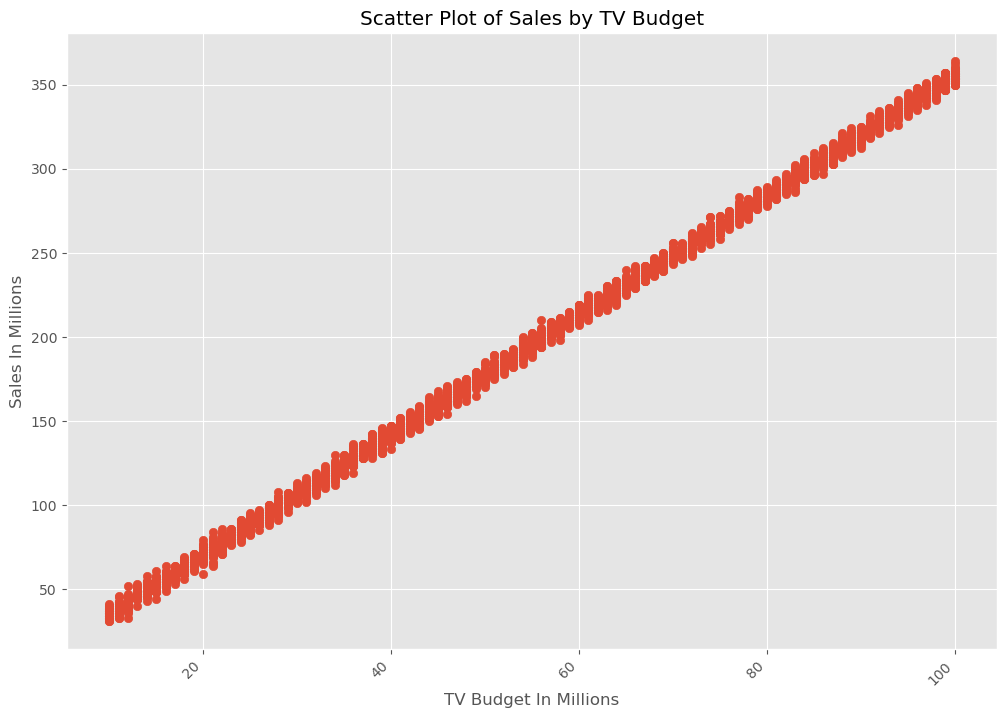

In [43]:
# Scatter Plot With Tv Budget Vs Sales 

plt.scatter(x=df['TV'], y=df['Sales'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('TV Budget In Millions')
plt.ylabel('Sales In Millions')
plt.title('Scatter Plot of Sales by TV Budget')

plt.show

<Axes: xlabel='TV', ylabel='Sales'>

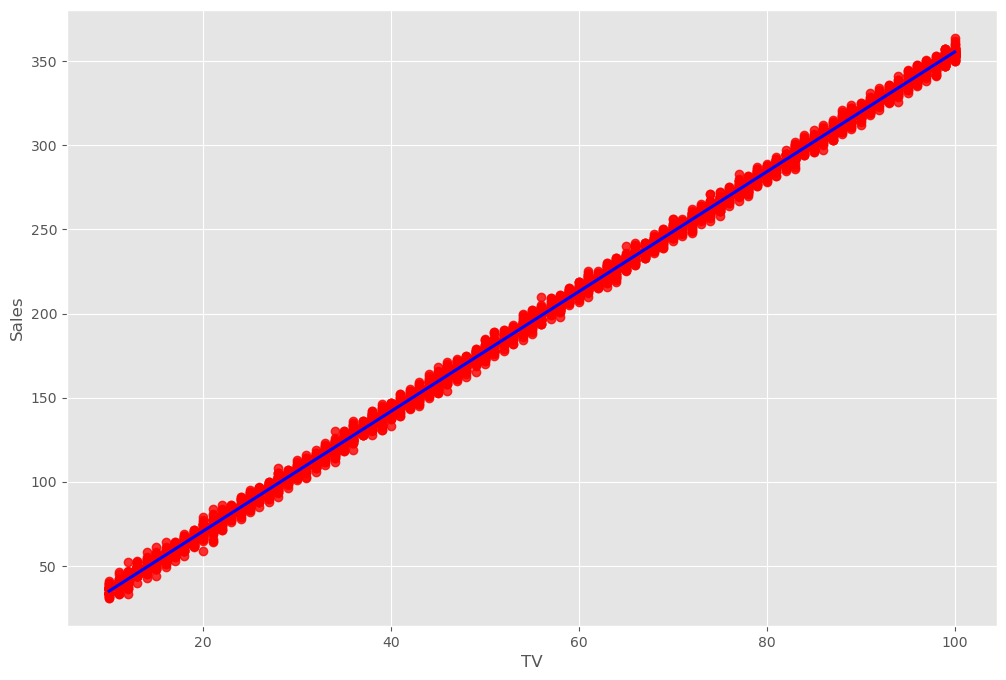

In [44]:
#Plot tv budget vs sales using seaborn 

sns.regplot(x='TV' , y = 'Sales' , data = df , scatter_kws = {"color" : "red"} , line_kws = {"color" : "blue"})

In [45]:
# Lets Start Looking At Correlation 
# Get Rid Of Any Non Numerical Data

df.select_dtypes(include=[np.number]).corr()

,TV,Radio,Social Media,Sales
TV,1.000000,0.868735,0.520482,0.999494
Radio,0.868735,1.000000,0.598740,0.868188
Social Media,0.520482,0.598740,1.000000,0.520252
Sales,0.999494,0.868188,0.520252,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

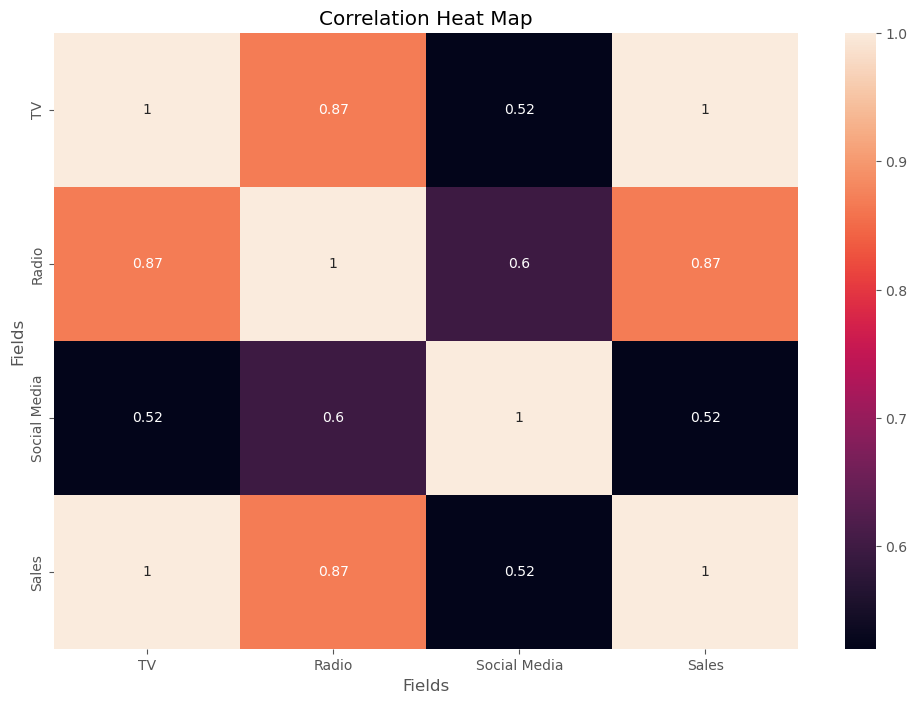

In [46]:
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True)
plt.xlabel('Fields')
plt.ylabel('Fields')
plt.title('Correlation Heat Map')
plt.show

In [47]:
# Create "df_numerized"
df_numerized = df.select_dtypes(include=[np.number])

In [48]:
#Group Correlations To Make It Easier To Read
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

TV            TV              1.000000
              Radio           0.868735
              Social Media    0.520482
              Sales           0.999494
Radio         TV              0.868735
              Radio           1.000000
              Social Media    0.598740
              Sales           0.868188
Social Media  TV              0.520482
              Radio           0.598740
              Social Media    1.000000
              Sales           0.520252
Sales         TV              0.999494
              Radio           0.868188
              Social Media    0.520252
              Sales           1.000000
dtype: float64

In [49]:
# Make Pairs For More Readability
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

Social Media  Sales           0.520252
Sales         Social Media    0.520252
TV            Social Media    0.520482
Social Media  TV              0.520482
Radio         Social Media    0.598740
Social Media  Radio           0.598740
Radio         Sales           0.868188
Sales         Radio           0.868188
TV            Radio           0.868735
Radio         TV              0.868735
TV            Sales           0.999494
Sales         TV              0.999494
TV            TV              1.000000
Radio         Radio           1.000000
Social Media  Social Media    1.000000
Sales         Sales           1.000000
dtype: float64

In [50]:
# Show Only Strong Correlations 
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

Social Media  Sales           0.520252
Sales         Social Media    0.520252
TV            Social Media    0.520482
Social Media  TV              0.520482
Radio         Social Media    0.598740
Social Media  Radio           0.598740
Radio         Sales           0.868188
Sales         Radio           0.868188
TV            Radio           0.868735
Radio         TV              0.868735
TV            Sales           0.999494
Sales         TV              0.999494
TV            TV              1.000000
Radio         Radio           1.000000
Social Media  Social Media    1.000000
Sales         Sales           1.000000
dtype: float64

In [51]:
# State The Correlation 
#TV Marketing Seems To Be The Most Effective Marketing Method In This Case